토픽 모델링(Topic Modeling)

  - 토픽 모델링은 문서 집합에서 주제를 찾아내기 위한 기술
  - 토픽 모델링은 '특정 주제에 관한 문서에서는 특정 단어가 자주 등장할 것이다'라는 직관을 기반
  - 예를 들어, 주제가 '개(dog)'인 문서에서는 개의 품종, 개의 특성을 나타내는 단어가 다른 문서에 비해 많이 등장
  - 주로 사용되는 토픽 모델링 방법은 잠재 의미 분석과 잠재 디리클레 할당 기법이 있음

1. 잠재 의미 분석(Latent Semantic Analysis) * 시간이 지난 알고리즘으로서 디리클레 할당이 더 많이 쓰임
   - 잠재 의미 분석(LSA)은 주로 문서 색인의 의미 검색에 사용
   - 잠재 의미 인덱싱(Latent Sementic Indexingm LSI)로도 알려져 있음
   - LSA의 목표는 문서와 단어의 기반이 되는 잠재적인 토픽을 발견하는 것
   - 잠재적인 토픽은 문서에 있는 단어들의 분포를 주도한다고 가정
   - LSA 방법
     - 문서 모음에서 생성한 문서-단어 행렬(Document Term Matrix)
     - => 단어-토픽 행렬(Term-Topic matrix)과 토픽-중요도 행렬(Topic-Importance Matrix), 그리고 토픽 문서-행렬(Topic-Document Matrix)로 분해

2. 잠재 디리클레 할당(Latent Dirichlet Allocation)
   - 잠재 디리클레 할당(LDA)는 대표적인 토픽 모델링 알고리즘 중 하나
   - 잠재 디리클레 할당 방법
     - 1. 사용자가 토픽의 개수를 지정해 알고리즘에 전달
     - 2. 모든 단어들을 토픽중 하나에 할당
     - 3. 모든 문서의 모든 단어에 대해 단어 w가 가정의 의거, p(t|d), p(w|t)에 따라 토픽을 재할당, 이를 반복, 이 때 가정은 자신만이 잘못된 토픽에 할당되어 있고 다른 모든 단어는 올바른 토픽에 할당된다는 것을 의미

   - p(t|d) - 문서 d의 단어들 중 토픽 t에 해당하는 비율
   - 해당 문서의 자주 등장하는 다른 단어의 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미
   - p(w|t) - 단어 w를 가지고 있는 모든 문서들 중 토픽 t가 할당된 비율
   - 다른 문서에서 단어 w에 많이 할당된 토픽이 해당 단어의 토픽이 될 가능성이 높음을 의미

데이터 전처리

In [1]:
# 데이터 로드
from sklearn.datasets import fetch_20newsgroups

datasets = fetch_20newsgroups(shuffle=True, random_state=1,
                              remove=('headers', 'footers', 'quotes'))

documents = datasets.data
print(len(documents))

11314


In [2]:
# 전처리를 위한 함수만들기
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import preprocess_string

nltk.download('stopwords')

# 정규표현식 적용
def clean_text(d):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern, '', d)
    return d

# 불용어 제거
def clean_stopword(d):
    stop_words = stopwords.words('english')
    return ' '.join([w.lower() for w in d.split() if w not in stop_words and len(w) > 3])

def preprocessing(d):
    return preprocess_string(d)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bitcamp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
import pandas as pd

news_df = pd.DataFrame({'article':documents})
len(news_df)

11314

In [4]:
news_df.replace("", float("NaN"), inplace=True)
news_df.dropna(inplace=True)
len(news_df)

11096

In [5]:
news_df['article'] = news_df['article'].apply(clean_text)
news_df['article']

0        Well i'm not sure about the story nad it did s...
1        \n\n\n\n\n\n\nYeah, do you expect people to re...
2        Although I realize that principle is not one o...
3        Notwithstanding all the legitimate fuss about ...
4        Well, I will have to change the scoring on my ...
                               ...                        
11309    Danny Rubenstein, an Israeli journalist, will ...
11310                                                   \n
11311    \nI agree.  Home runs off Clemens are always m...
11312    I used HP DeskJet with Orange Micros Grappler ...
11313                                          ^^^^^^\n...
Name: article, Length: 11096, dtype: object

In [6]:
news_df['article'] = news_df['article'].apply(clean_stopword)
len(news_df['article'])

11096

In [7]:
tokenized_news = news_df['article'].apply(preprocessing)
tokenized_news = tokenized_news.to_list()
len(tokenized_news[0])

57

In [8]:
drop_news = [index for index, sentence in enumerate(tokenized_news) if len(sentence) <= 1]
news_texts = np.delete(tokenized_news, drop_news, axis=0)
print(len(news_texts))

10936


C:\ProgramData\Anaconda3\envs\py37\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Gensim을 이용한 토픽 모델링

In [9]:
from gensim import corpora

dictionary = corpora.Dictionary(news_texts)
corpus = [dictionary.doc2bow(text) for text in news_texts]

print(corpus[1])

[(51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 2), (59, 1), (60, 1), (61, 1), (62, 2), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 3), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 2), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 1)]


1. 잠재 의미 분석을 위한 LsiModel

In [10]:
from gensim.models import LsiModel

lsi_model = LsiModel(corpus, num_topics=20, id2word=dictionary)
topics = lsi_model.print_topics()
topics

# 벡터화하고 20개의 토픽으로 나눔

[(0,
  '-0.994*"max" + -0.069*"giz" + -0.068*"bhj" + -0.025*"qax" + -0.015*"biz" + -0.014*"nrhj" + -0.014*"bxn" + -0.012*"nui" + -0.011*"ghj" + -0.011*"zei"'),
 (1,
  '0.381*"file" + 0.193*"program" + 0.169*"edu" + 0.162*"imag" + 0.130*"avail" + 0.126*"output" + 0.119*"includ" + 0.115*"inform" + 0.101*"pub" + 0.100*"time"'),
 (2,
  '-0.408*"file" + -0.335*"output" + -0.216*"entri" + 0.171*"peopl" + 0.153*"know" + -0.137*"onam" + -0.134*"program" + 0.131*"said" + -0.129*"printf" + -0.115*"char"'),
 (3,
  '0.249*"imag" + 0.226*"edu" + -0.214*"output" + -0.165*"peopl" + -0.157*"know" + -0.155*"entri" + -0.153*"said" + 0.153*"avail" + 0.142*"jpeg" + 0.124*"pub"'),
 (4,
  '-0.549*"wire" + -0.223*"ground" + 0.214*"jpeg" + 0.213*"file" + 0.169*"imag" + -0.164*"circuit" + -0.157*"outlet" + -0.139*"connect" + -0.129*"subject" + -0.126*"neutral"'),
 (5,
  '-0.400*"jpeg" + -0.345*"imag" + 0.276*"anonym" + -0.246*"wire" + 0.160*"privaci" + 0.156*"internet" + -0.151*"color" + 0.144*"post" + 0.125*"

In [11]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25
coherence_scores = []

for num_topics in range(min_topics, max_topics):
    model = LsiModel(corpus, num_topics=num_topics, id2word=dictionary)
    coherence = CoherenceModel(model=model, 
                               texts=news_texts,
                               dictionary=dictionary)
    coherence_scores.append(coherence.get_coherence())
    
print(coherence_scores) 

[0.4278885893490417, 0.4664722829825744, 0.43812651421905086, 0.4328621760824859, 0.5121582869234018]


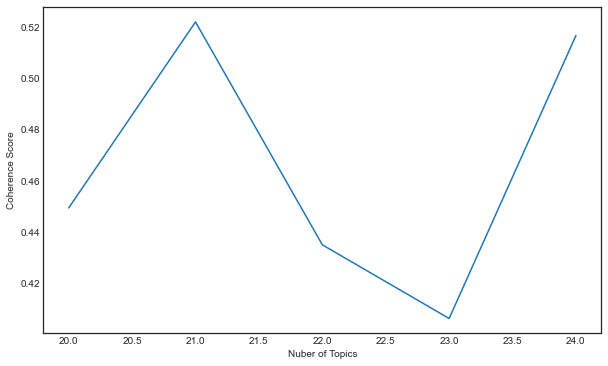

In [32]:
# LsiModel 시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize=(10, 6))
plt.plot(x, coherence_scores)
plt.xlabel('Nuber of Topics')
plt.ylabel('Coherence Score')

plt.show()

In [33]:
lsi_model = LsiModel(corpus, num_topics=24, id2word=dictionary)
topics = lsi_model.print_topics(num_topics=24)
topics

[(0,
  '0.994*"max" + 0.069*"giz" + 0.068*"bhj" + 0.025*"qax" + 0.015*"biz" + 0.014*"nrhj" + 0.014*"bxn" + 0.012*"nui" + 0.011*"ghj" + 0.011*"zei"'),
 (1,
  '0.381*"file" + 0.193*"program" + 0.169*"edu" + 0.162*"imag" + 0.130*"avail" + 0.126*"output" + 0.119*"includ" + 0.115*"inform" + 0.101*"pub" + 0.100*"time"'),
 (2,
  '-0.408*"file" + -0.335*"output" + -0.216*"entri" + 0.171*"peopl" + 0.153*"know" + -0.137*"onam" + -0.134*"program" + 0.131*"said" + -0.129*"printf" + -0.115*"char"'),
 (3,
  '0.249*"imag" + 0.226*"edu" + -0.214*"output" + -0.165*"peopl" + -0.157*"know" + -0.155*"entri" + -0.153*"said" + 0.153*"avail" + 0.142*"jpeg" + 0.124*"pub"'),
 (4,
  '-0.549*"wire" + -0.223*"ground" + 0.214*"jpeg" + 0.213*"file" + 0.169*"imag" + -0.164*"circuit" + -0.157*"outlet" + -0.139*"connect" + -0.129*"subject" + -0.126*"neutral"'),
 (5,
  '-0.400*"jpeg" + -0.345*"imag" + 0.276*"anonym" + -0.246*"wire" + 0.160*"privaci" + 0.156*"internet" + -0.151*"color" + 0.144*"post" + 0.125*"inform" + 

2. 잠재 디리클래 할당을 위한 LdaModel

In [34]:
from gensim.models import LdaModel

lda_model = LdaModel(corpus, num_topics=20, id2word=dictionary)
topics = lda_model.print_topics()
topics

[(0,
  '0.011*"drive" + 0.010*"think" + 0.008*"peopl" + 0.008*"chip" + 0.008*"presid" + 0.008*"know" + 0.008*"go" + 0.007*"work" + 0.007*"kei" + 0.007*"time"'),
 (1,
  '0.011*"edu" + 0.009*"rockefel" + 0.007*"hamburg" + 0.007*"com" + 0.006*"professor" + 0.005*"let" + 0.005*"scroll" + 0.005*"spell" + 0.004*"seagat" + 0.004*"like"'),
 (2,
  '0.023*"armenian" + 0.009*"turkish" + 0.009*"peopl" + 0.007*"greek" + 0.007*"said" + 0.005*"turkei" + 0.005*"russian" + 0.005*"like" + 0.004*"turk" + 0.004*"muslim"'),
 (3,
  '0.009*"peopl" + 0.008*"state" + 0.006*"govern" + 0.006*"right" + 0.005*"public" + 0.004*"know" + 0.004*"time" + 0.004*"case" + 0.004*"nation" + 0.004*"like"'),
 (4,
  '0.014*"edu" + 0.014*"pitt" + 0.013*"gordon" + 0.012*"surrend" + 0.012*"skeptic" + 0.011*"bank" + 0.011*"soon" + 0.011*"henrik" + 0.010*"intellect" + 0.010*"shame"'),
 (5,
  '0.324*"max" + 0.034*"scsi" + 0.030*"bhj" + 0.009*"printer" + 0.007*"chz" + 0.005*"decenso" + 0.005*"bit" + 0.005*"rlk" + 0.004*"vfq" + 0.004*

In [35]:
from gensim.models.coherencemodel import CoherenceModel

min_topics, max_topics = 20, 25
coherence_scores = []

for num_topics in range(min_topics, max_topics):
    model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    coherence = CoherenceModel(model=model, 
                               texts=news_texts,
                               dictionary=dictionary)
    coherence_scores.append(coherence.get_coherence())
    
print(coherence_scores) 

[0.48450878689520105, 0.5101701215849446, 0.4786577586127543, 0.539647157949454, 0.503310680393505]


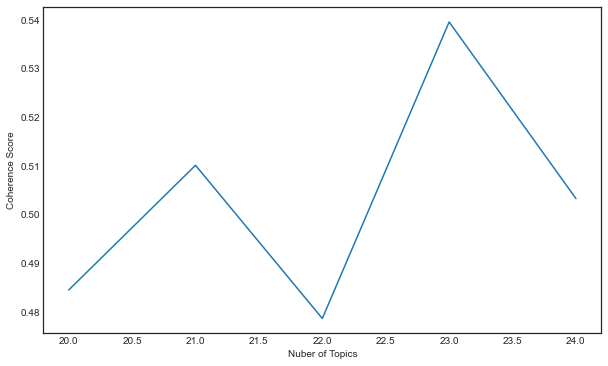

In [36]:
# LdaModel 시각화
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

x = [int(i) for i in range(min_topics, max_topics)]

plt.figure(figsize=(10, 6))
plt.plot(x, coherence_scores)
plt.xlabel('Nuber of Topics')
plt.ylabel('Coherence Score')

plt.show()

In [37]:
lda_model = LdaModel(corpus, num_topics=23, id2word=dictionary)
topics = lda_model.print_topics(23)
type(topics)

list

3. 토픽 모델링 시각화

In [40]:
import pyLDAvis.gensim_models
import pyLDAvis

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\bitcamp\.conda\envs\py37\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
